# Exploratory Data Analysis and Preprocessing

This notebook is designed for preliminary data analysis and full preparation of data for input to the model.

The main tasks to be performed in this part:

1. Conduct an Exploratory Data Analysis and make hypotheses about the influence of individual characteristics on the target characteristic `y'.

2. Describe which methods consider appropriate and choose a metric for assessing the quality of the models.

3. Preprocess the data for further transfer to the model. Preprocessing include:
    - grouping categories into categorical variables, if necessary
    - filling in missing values, if any
    - identifying outliers and deciding what to do with them
    - creating additional features that may improve the quality of ML models.

## Dataset

The data is related to direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y). [Kaggle dataset]( https://www.kaggle.com/datasets/sahistapatel96/bankadditionalfullcsv.)

| Variable Name   | Role    | Type        | Description                                                                                                                                                   |
|-----------------|---------|-------------|---------------------------------------------------------------------------------------------------------------------------------------------------------------|
| age             | Feature | Integer     |                                                                                                                                                               |
| job             | Feature | Categorical | type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown') |
| marital         | Feature | Categorical | marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)                                             |
| education       | Feature | Categorical | (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')                                 |
| default         | Feature | Binary      | has credit in default?                                                                                                                                        |
| balance         | Feature | Integer     | average yearly balance                                                                                                                                        |
| housing         | Feature | Binary      | has housing loan?                                                                                                                                             |
| loan            | Feature | Binary      | has personal loan?                                                                                                                                            |
| contact         | Feature | Categorical | contact communication type (categorical: 'cellular','telephone')                                                                                              |
| day_of_week     | Feature | Date        | last contact day of the week                                                                                                                                  |
| month           | Feature | Date        | last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')                                                                              |
| duration        | Feature | Integer     | last contact duration, in seconds (numeric). Important note: **this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model**. |
| campaign        | Feature | Integer     | number of contacts performed during this campaign and for this client (numeric, includes last contact)                                                        |
| pdays           | Feature | Integer     | number of days that passed by after the client was last contacted from a previous campaign (numeric; -1 means client was not previously contacted)             |
| previous        | Feature | Integer     | number of contacts performed before this campaign and for this client                                                                                         |
| poutcome        | Feature | Categorical | outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')                                                                   |
| emp.var.rate    | Feature | Float       | employment variation rate                                                                                                                |
| cons.price.idx  | Feature | Float       | consumer price index                                                                                                                       |
| cons.conf.idx   | Feature | Float       | consumer confidence index                                                                                                                  |
| euribor3m       | Feature | Float       | euribor 3 month rate                                                                                                                                          |
| nr.employed     | Feature | Integer     | number of employees in thousands (specific values reflecting employment levels at different periods)                                                                                                                      |
| y               | Target  | Binary      | has the client subscribed a term deposit?                                                                                                                     |




In [11]:
%load_ext autoreload
%autoreload 2

Import all libraries in one place

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
import sys
import os
import warnings

warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=pd.errors.SettingWithCopyWarning)

project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
if project_root not in sys.path:
    sys.path.append(project_root)

# Import the module
from src import viz_plots as vp

pd.set_option('display.max.columns',100)
pd.set_option('float_format', '{:.2f}'.format)

# EDA

First of all let's read the data, check data types and whether we have any missing values:

In [13]:
data = pd.read_csv('../data/bank-additional-full.csv', sep=';')
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

So, we have 10 categorical columns and 10 numerical + tagret

Let us analyse categorical and numerical values separately.

## Numerical data analisys


In [15]:
data['target'] = data['y'].apply(lambda x: 1 if x == 'yes' else 0)  
target_data = data['target']

input_data = data.drop('y', axis=1)
input_data = input_data.drop('target', axis=1)

num_cols = list(data.select_dtypes(include=['int64', 'float64']).columns)
cat_cols = list(data.select_dtypes(include=['object']).columns)
print('Categorical columns:', cat_cols, '\nNumerical columns:', num_cols) 

Categorical columns: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y'] 
Numerical columns: ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'target']


### Correlation 
To begin with, let's get a look at the correlation analysis and see which features have the greatest impact on our target column

<Axes: >

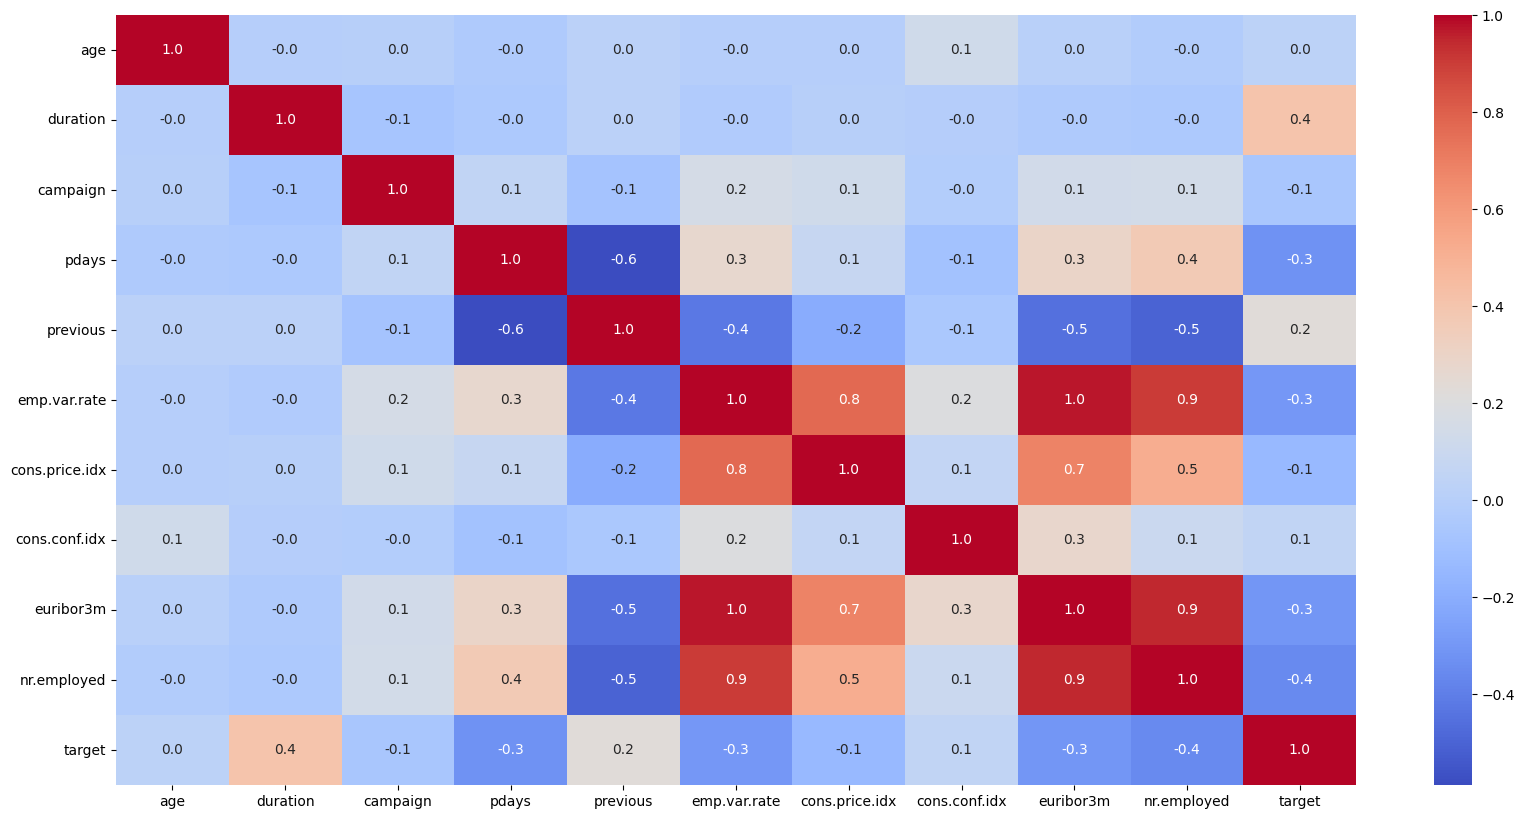

In [16]:
corr = data[num_cols].corr()
plt.figure(figsize=(20, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.1f')

- Moderate negative correlations with the target.
    - *pdays*(-0.3),
    - *emp.var.rate* (-0.3), 
    - *euribor3m* (-0.3), 
    - *nr.employed* (-0.4) 
     
- *duration* (0.4) has the strongest positive correlation with the target.
- *euribor3m* and *nr.employed* have extremely high positive correlation which may impact which sensitive to multicollinearity 

In [17]:
data1 = data[data['target'] == 1]
data0 = data[data['target'] == 0]

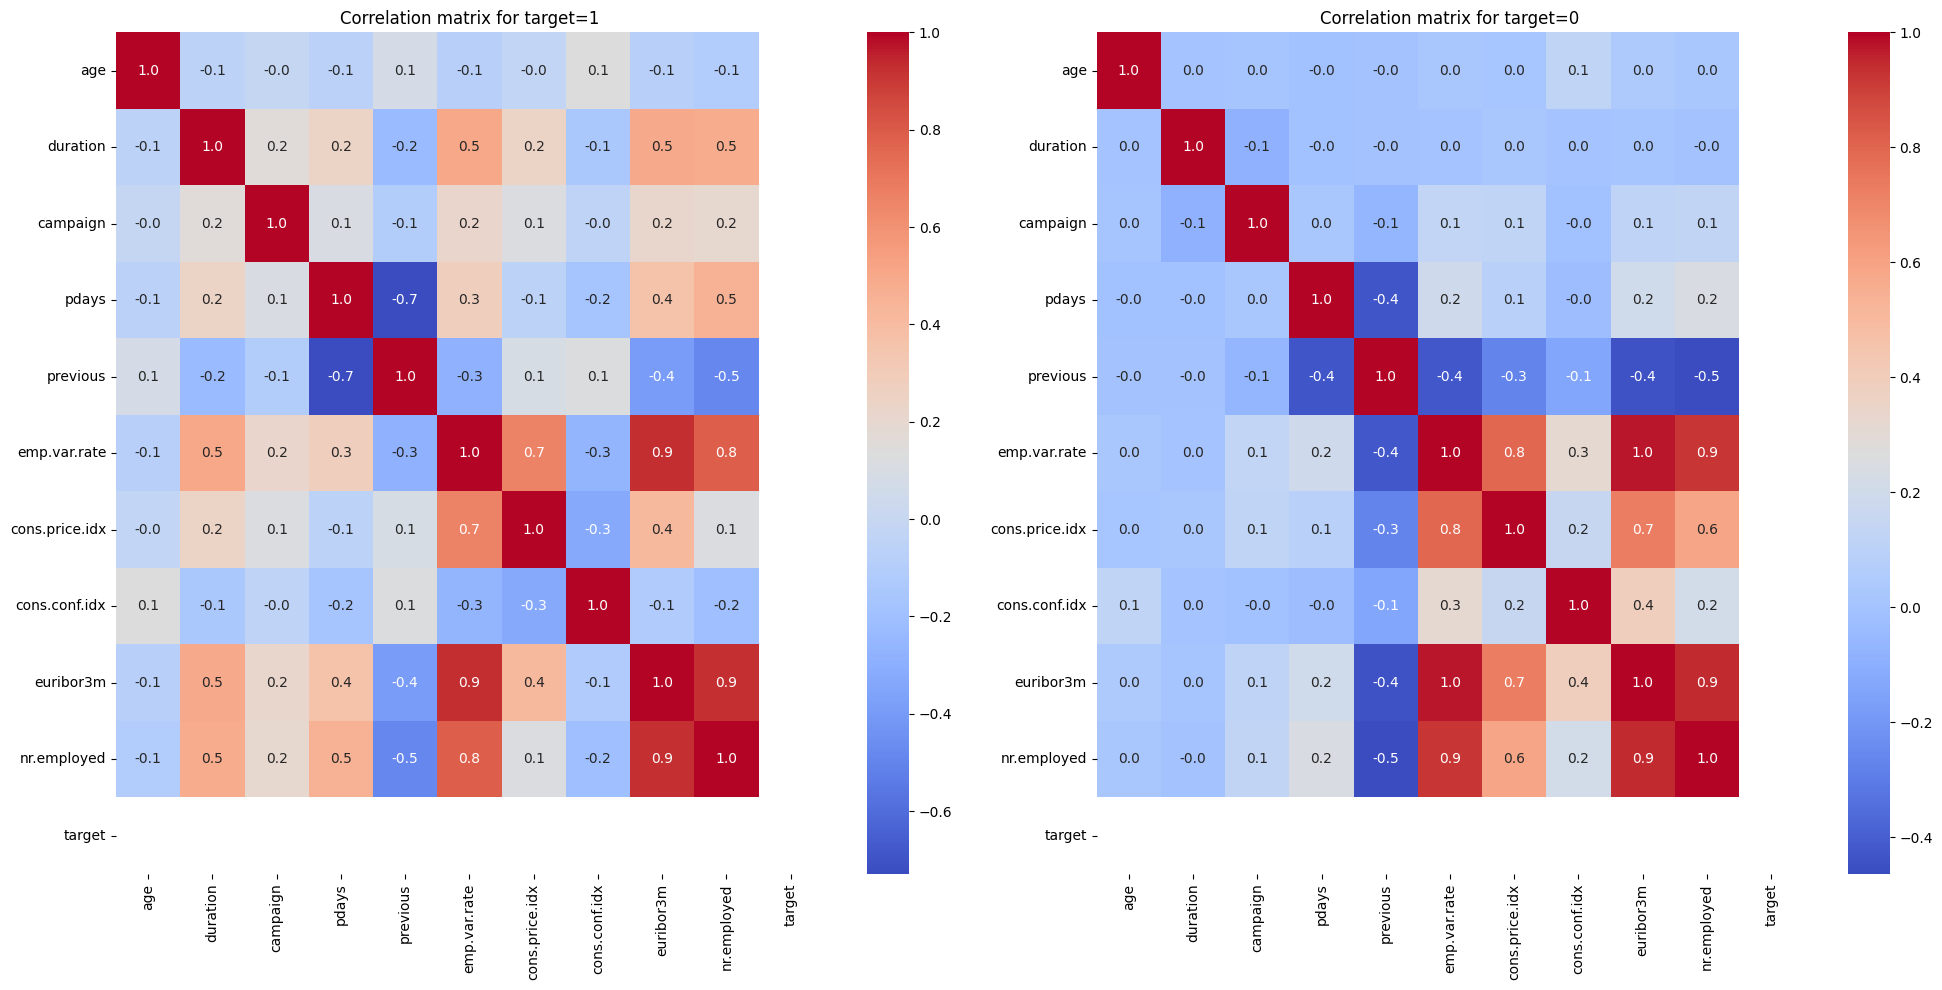

In [18]:
corr1 = data1[num_cols].corr()
corr0 = data0[num_cols].corr()

plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
sns.heatmap(corr1, annot=True, cmap='coolwarm', fmt='.1f')
plt.title('Correlation matrix for target=1')

plt.subplot(1, 2, 2)
sns.heatmap(corr0, annot=True, cmap='coolwarm', fmt='.1f')
plt.title('Correlation matrix for target=0')

plt.tight_layout()
plt.show()



- The differences in correlation patterns between target=1 and target=0 suggest that some features influence outcomes differently depending on the target class.

- *emp.var.rate*, *euribor3m*, and *nr.employed* are strongly correlated in both target groups.
- *cons.price.idx* and *emp.var.rate* show a strong correlation in both matrices.

- In the target=1 matrix (left), *pdays* has a noticeable negative correlation with *previous*, but this correlation is weaker when target=0. The same situation between *pdays* and *nr.employed*, *euribor3m*


- The strong correlations suggest possible multicollinearity, which could affect model performance for regression models. It may be required to remove highly correlated features like nr.employed or euribor3m to prevent multicollinearity for this model

### Distribution and outliers
Next, Let's look at the descriptive statistics  and find outliers by interquartile range

In [19]:
data_num_stat = pd.DataFrame([data[num_cols].mean(), data[num_cols].min(), data[num_cols].max()], index=['mean',  'min', 'max'])

data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,target
count,41188.00,41188.00,41188.00,41188.00,41188.00,41188.00,41188.00,41188.00,41188.00,41188.00,41188.00
mean,40.02,258.29,2.57,962.48,0.17,0.08,93.58,-40.50,3.62,5167.04,0.11
std,10.42,259.28,2.77,186.91,0.49,1.57,0.58,4.63,1.73,72.25,0.32
min,17.00,0.00,1.00,0.00,0.00,-3.40,92.20,-50.80,0.63,4963.60,0.00
25%,32.00,102.00,1.00,999.00,0.00,-1.80,93.08,-42.70,1.34,5099.10,0.00
50%,38.00,180.00,2.00,999.00,0.00,1.10,93.75,-41.80,4.86,5191.00,0.00
75%,47.00,319.00,3.00,999.00,0.00,1.40,93.99,-36.40,4.96,5228.10,0.00
max,98.00,4918.00,56.00,999.00,7.00,1.40,94.77,-26.90,5.04,5228.10,1.00


In [20]:
outliers = {}
for col in num_cols:
    outlier = vp.outlier_range(data, col)
    outliers[col] = outlier
    
outliers_df = pd.DataFrame([outliers], index=['outlier'])    

The maximum value after which there are outliers for age: 69.5
The maximum value after which there are outliers for duration: 644.5
The maximum value after which there are outliers for campaign: 6.0
The maximum value after which there are outliers for pdays: 999.0
The maximum value after which there are outliers for previous: 0.0
The maximum value after which there are outliers for emp.var.rate: 6.200000000000001
The maximum value after which there are outliers for cons.price.idx: 95.3725
The maximum value after which there are outliers for cons.conf.idx: -26.949999999999992
The maximum value after which there are outliers for euribor3m: 10.3865
The maximum value after which there are outliers for nr.employed: 5421.6
The maximum value after which there are outliers for target: 0.0


In [21]:
data_num_stat = pd.concat([data_num_stat, outliers_df], axis=0)
data_num_stat

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,target
mean,40.02,258.29,2.57,962.48,0.17,0.08,93.58,-40.50,3.62,5167.04,0.11
min,17.00,0.00,1.00,0.00,0.00,-3.40,92.20,-50.80,0.63,4963.60,0.00
max,98.00,4918.00,56.00,999.00,7.00,1.40,94.77,-26.90,5.04,5228.10,1.00
outlier,69.50,644.50,6.00,999.00,0.00,6.20,95.37,-26.95,10.39,5421.60,0.00


- The *pdays* variable exhibits an unusual distribution, with a minimum value of 0, a mean of 962.48, and a maximum of 999. The high value of 999 might represent clients who were not contacted for a long time.
- *campaign* also has a distribution that needs to be studied in more detail with average = 2.55, maximum = 56. and outliers greater than 6
- Also outliers is occur in the *duration* column, but according to the dataset description, this column cannot be used in any way, since it is quite informative

In [22]:
data.drop(columns=['duration'], inplace=True)

#### *pdays*

In [23]:
data.pdays.unique()

array([999,   6,   4,   3,   5,   1,   0,  10,   7,   8,   9,  11,   2,
        12,  13,  14,  15,  16,  21,  17,  18,  22,  25,  26,  19,  27,
        20])

In [24]:
data[data.pdays != 999].target.value_counts(), data[data.pdays == 999].target.value_counts()

(target
 1    967
 0    548
 Name: count, dtype: int64,
 target
 0    36000
 1     3673
 Name: count, dtype: int64)

- More people have not been contacted beforehand and we see that in the absence of prior contact, the conversion rate of a target is 1 order of magnitude lower. It seems that it is advisable to create a separate feature that will flag whether we had pdays or not (pdays = 999)

#### *campaign*

In [25]:
data['campaign'].describe( percentiles =[0.75, 0.9, 0.99, 0.999, 0.9999])

count    41188.00
mean         2.57
std          2.77
min          1.00
50%          2.00
75%          3.00
90%          5.00
99%         14.00
99.9%       29.00
99.99%      41.88
max         56.00
Name: campaign, dtype: float64

In [26]:
percentile_0999 = data['campaign'].quantile(0.9999)
cont = data[data['campaign'] > percentile_0999]
print( 'Number of records with duration less than 99.99 percentile:', cont.shape[0], 'percent:', percentile_0999)

Number of records with duration less than 99.99 percentile: 5 percent: 41.881299999993644


<Figure size 2000x1000 with 0 Axes>

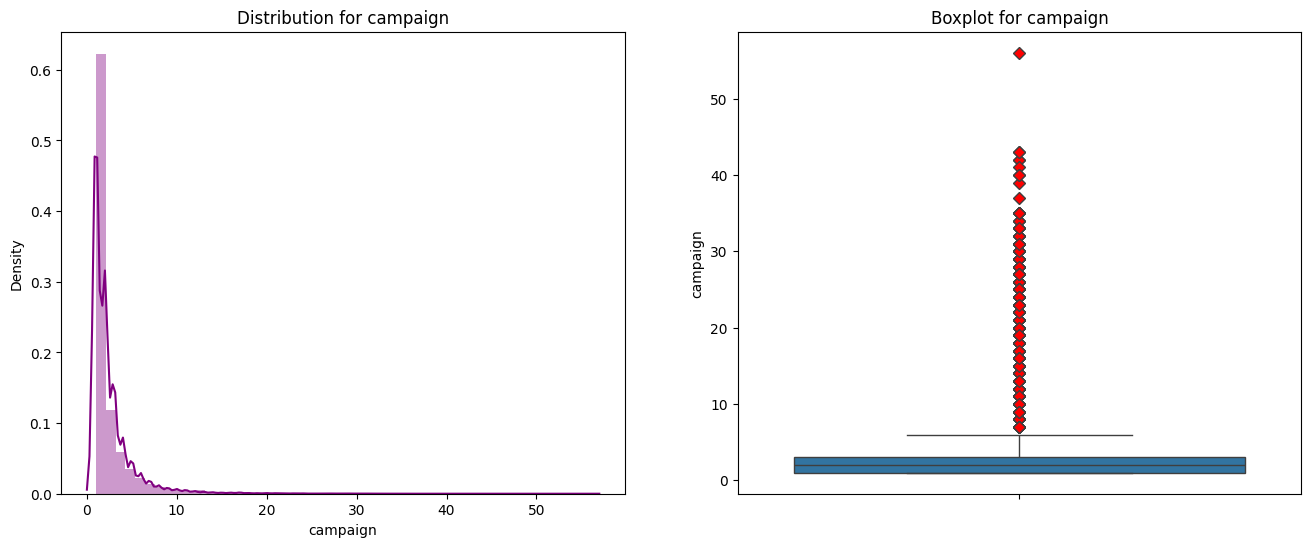

In [27]:
plt.figure(figsize=(20, 10))
vp.dist_box(data,'campaign')

The maximum value after which there are outliers for campaign: 6.0
The maximum value after which there are outliers for campaign: 3.5


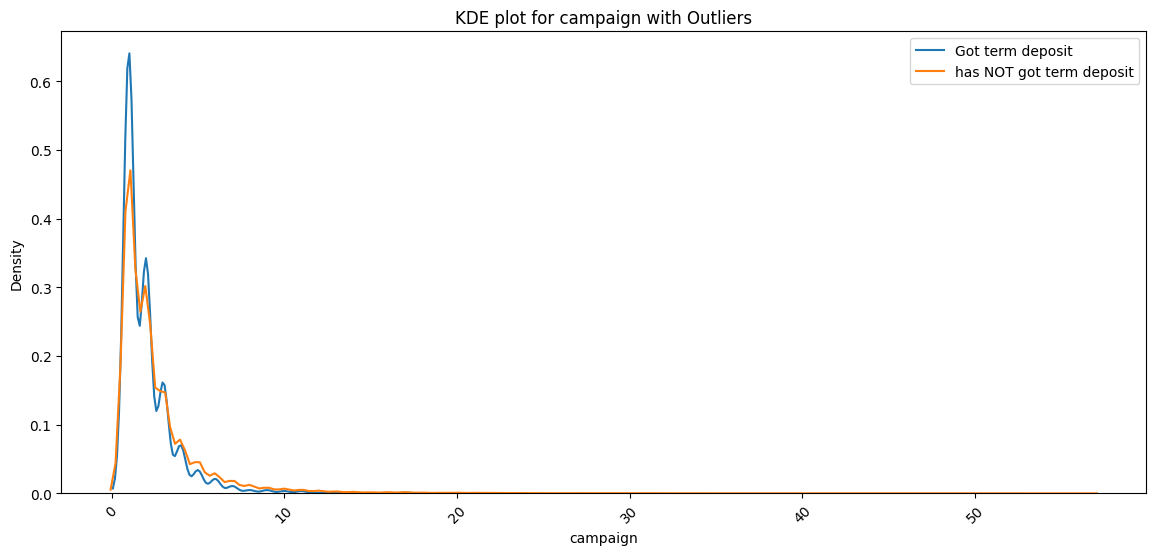

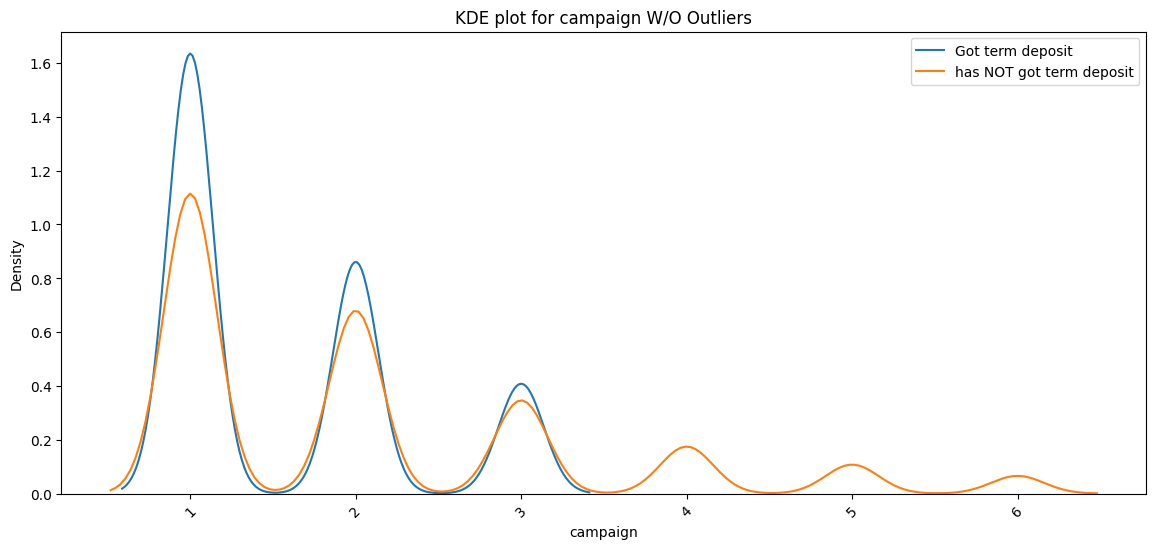

In [28]:
max_duration_v0, max_duration_v1 = vp.outlier_analisys(data0, data1, 'campaign')

In [29]:
cont_high  = data[data['campaign'] > percentile_0999]
cont_low = data[data['campaign'] <= percentile_0999]

cont_low.target.value_counts(), cont_high.target.value_counts()

(target
 0    36543
 1     4640
 Name: count, dtype: int64,
 target
 0    5
 Name: count, dtype: int64)

- The distribution is right-skewed, most clients were contacted only  a few times, with 75% of the data having 3 or fewer contacts.
- There are outliers with a significantly higher number of contacts, reaching up to 56. This suggests that while the majority of clients were contacted a limited number of times, a small fraction experienced a much higher frequency of contact. However,all customers contacted too often did not agree to a loan 
- I suggest removing this data as outliers based on threshold 99.99%

In [30]:
campaign9999 = data['campaign'].quantile(0.9999)
cont = data[data['campaign'] > percentile_0999]


data_clear = data[(data['campaign'] <= campaign9999)]
clear_shape = data_clear.shape[0]

In [31]:
origin_shape = data.shape[0]

In [32]:
print(f'Number of records removed: {origin_shape - clear_shape}, data reduces by {((origin_shape - clear_shape) / origin_shape) * 100:.2f}%')

Number of records removed: 5, data reduces by 0.01%


In [33]:
data_clear.describe()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,target
count,41183.00,41183.00,41183.00,41183.00,41183.00,41183.00,41183.00,41183.00,41183.00,41183.00
mean,40.02,2.56,962.47,0.17,0.08,93.58,-40.50,3.62,5167.03,0.11
std,10.42,2.73,186.92,0.49,1.57,0.58,4.63,1.73,72.25,0.32
min,17.00,1.00,0.00,0.00,-3.40,92.20,-50.80,0.63,4963.60,0.00
25%,32.00,1.00,999.00,0.00,-1.80,93.08,-42.70,1.34,5099.10,0.00
50%,38.00,2.00,999.00,0.00,1.10,93.75,-41.80,4.86,5191.00,0.00
75%,47.00,3.00,999.00,0.00,1.40,93.99,-36.40,4.96,5228.10,0.00
max,98.00,41.00,999.00,7.00,1.40,94.77,-26.90,5.04,5228.10,1.00


Finally, let's see how different features are distributed among target groups

In [34]:
data.groupby('y')[data.select_dtypes(exclude='object').columns].agg(['mean','min','max'])

age         campaign          pdays          previous          \
     mean min max     mean min max   mean min  max     mean min max   
y                                                                     
no  39.91  17  95     2.63   1  56 984.11   0  999     0.13   0   7   
yes 40.91  17  98     2.05   1  23 792.04   0  999     0.49   0   6   

    emp.var.rate            cons.price.idx             cons.conf.idx         \
            mean   min  max           mean   min   max          mean    min   
y                                                                             
no          0.25 -3.40 1.40          93.60 92.20 94.77        -40.59 -50.80   
yes        -1.23 -3.40 1.40          93.35 92.20 94.77        -39.79 -50.80   

           euribor3m           nr.employed                 target          
       max      mean  min  max        mean     min     max   mean min max  
y                                                                          
no  -26.90      3.81 0.63 5.04     5176.17 4963.60 5228.10   0.00   0   0  
yes -26.90      2.12 0.63 5.04     5095.12 4963.60 5228.10   1.00   1   1

- Days since last contact (pdays):
    - Much lower mean for yes (792.04) VS no (984.11).

- Number of previous contacts (previous):
    - yes group had more previous interactions (mean = 0.49) VS no (0.13) 

-> More previous interactions seem to be associated with a positive response.

- Employment variation rate (emp.var.rate):
    - yes: -1.23 VS no: 0.25. 
    - Negative economic conditions may lead to more responses.


- Number of employees (nr.employed):
    - yes: 5095.12 VS. no: 5176.17 
    - Fewer employees linked to higher response rates.

-> Customers respond more during economic downturns

## Categorical data

In [35]:
data[cat_cols]

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,no
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent,no
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent,no
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,no
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent,no
...,...,...,...,...,...,...,...,...,...,...,...
41183,retired,married,professional.course,no,yes,no,cellular,nov,fri,nonexistent,yes
41184,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,nonexistent,no
41185,retired,married,university.degree,no,yes,no,cellular,nov,fri,nonexistent,no
41186,technician,married,professional.course,no,no,no,cellular,nov,fri,nonexistent,yes


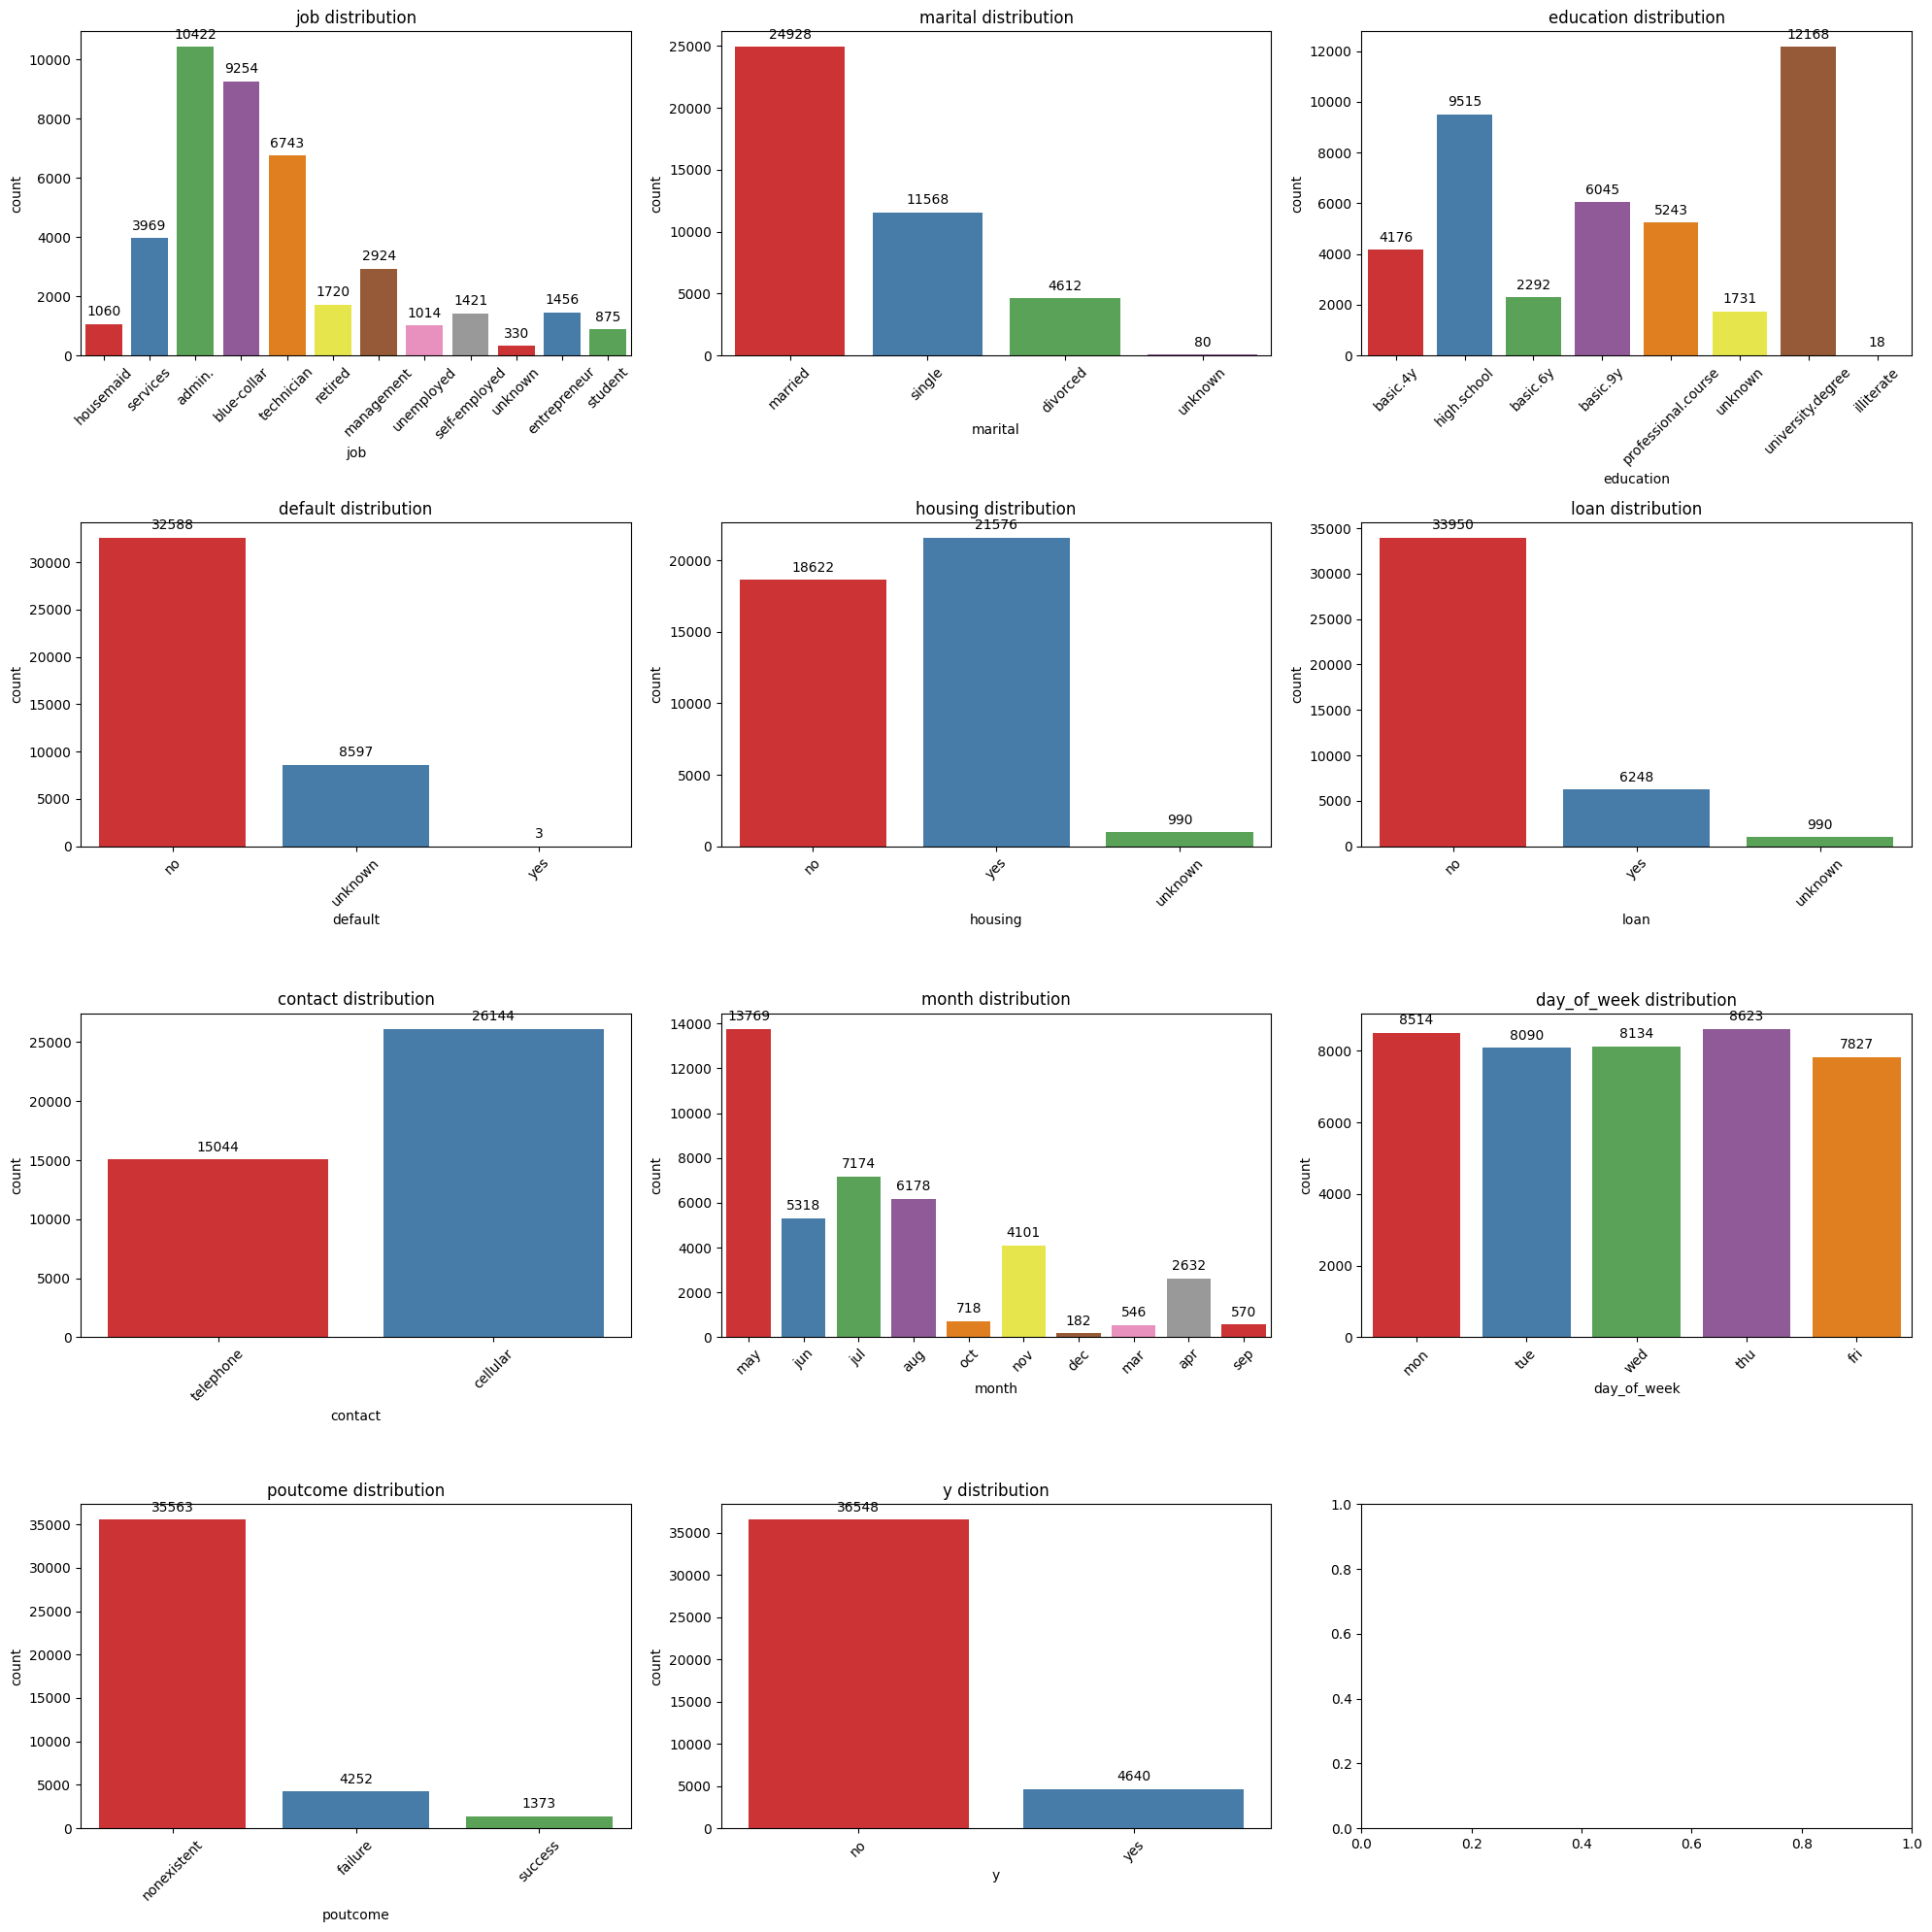

In [36]:
fig, ax = plt.subplots(4, 3, figsize=(20, 20))
for i, col in enumerate(cat_cols):
    plot = sns.countplot(data=data, x=col, hue=col, palette='Set1', ax=ax[i//3, i%3], legend=False)
    ax[i//3, i%3].set_title(f'{col} distribution')
    ax[i//3, i%3].tick_params(axis='x', rotation=45)
    for p in plot.patches:
        plot.annotate(format(p.get_height(), '.0f'), 
                      (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha = 'center', va = 'center', 
                      xytext = (0, 9), 
                      textcoords = 'offset points')

plt.tight_layout()
plt.show()

1. The most common job categories are "admin." (~10k) and "blue-collar" (~9k). The least represented are "unknown" (~330) and "entrepreneur" (~1k).

2. Most respondents are married (~28k)

3. The majority has to the "university degree" (11k), the second largest group is "high school" (~9k).

4. The most common months for contacts were May (~17k), followed by Jul (~7k). The least common were Dec (~182) and Nov (~546).

5. The contacts were evenly distributed across weekdays.

6. Target Variable: majority did not respond positively 89%, Only 11% said "yes".

In [37]:
print(data.columns[data.columns.duplicated()])

Index([], dtype='object')


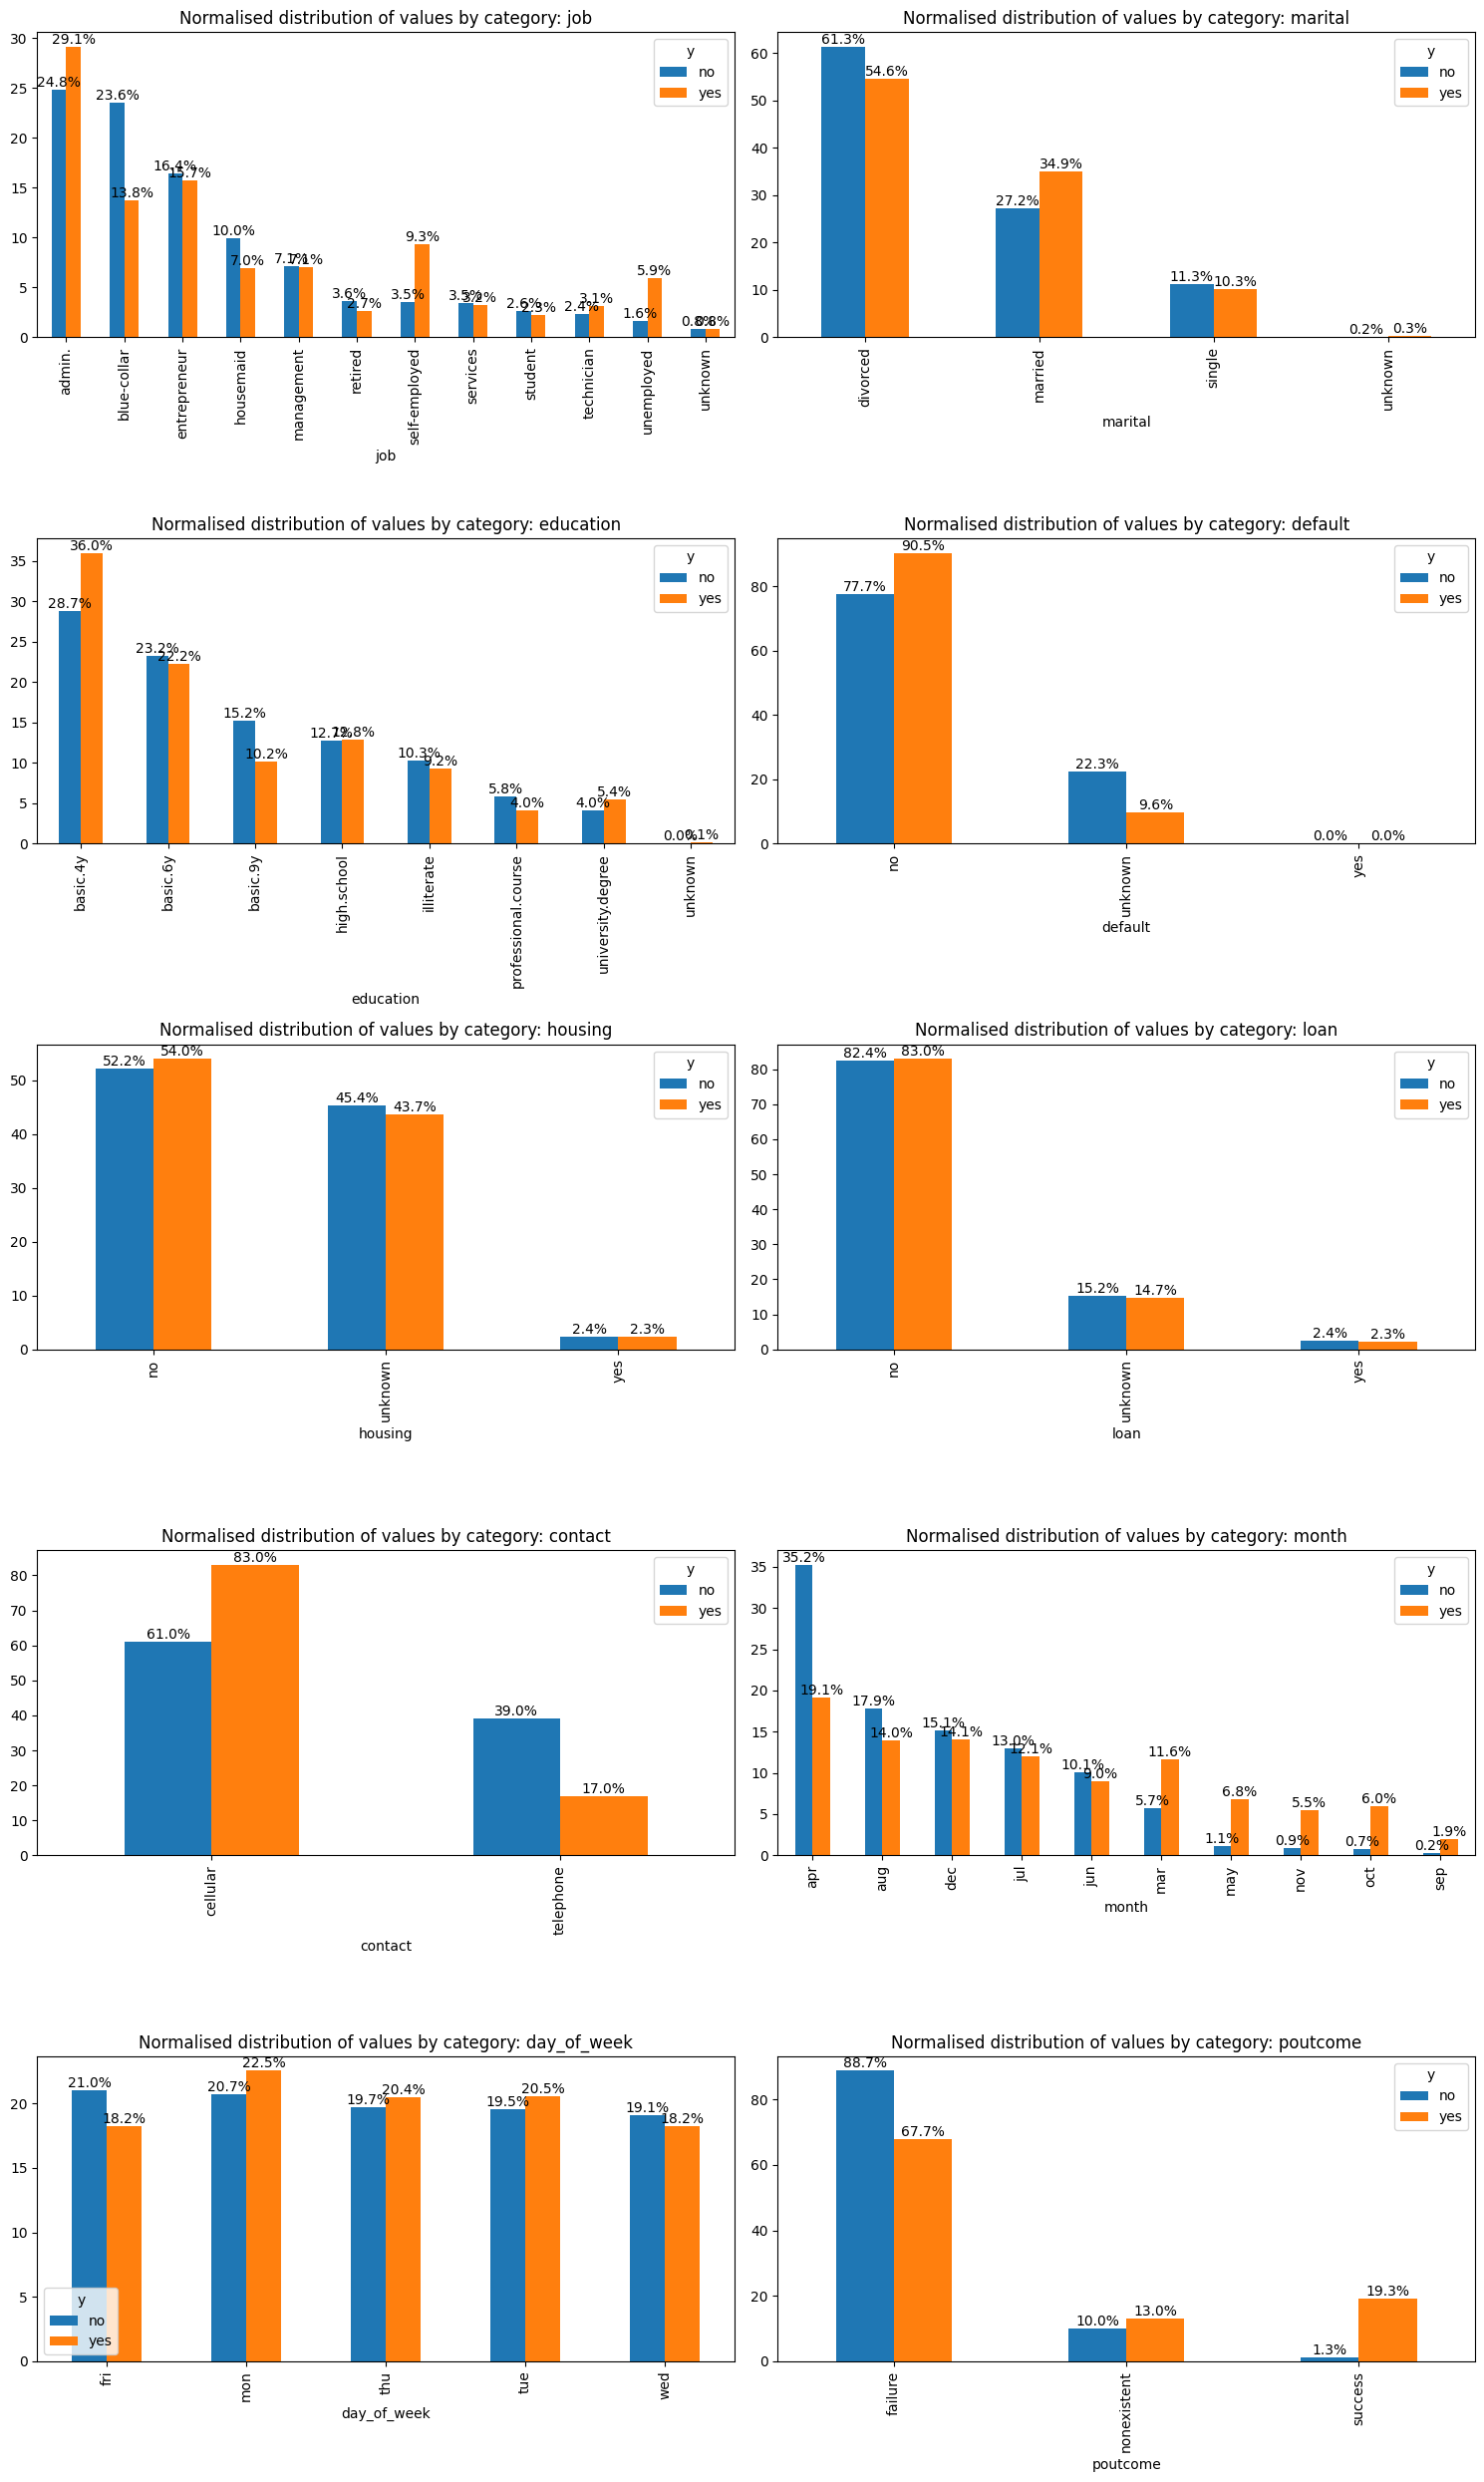

In [38]:
cat_cols_woY = cat_cols.copy()
cat_cols_woY.remove('y')
vp.create_subplots(data, cat_cols_woY)

- Job
    - It can be seen that the unemployed, self-employed and administrators are more likely to agree to a deposit
    - While blue-collar workers are more likely to reject

- Education
    - People with a 4th grade education are also more likely to agree to a deposit
    - Whereas people with a basic education of 9 grades are more likely to decline.

- Another interesting observation is that there are more refusals when contacting by telephone, but there are much more approvals when using a cellular.



In [39]:
data_clear1 = data_clear[data_clear['target'] == 1]  
data_clear0 = data_clear[data_clear['target'] == 0]

THE CLIENT HAS TAKEN OUT A TERM DEPOSIT


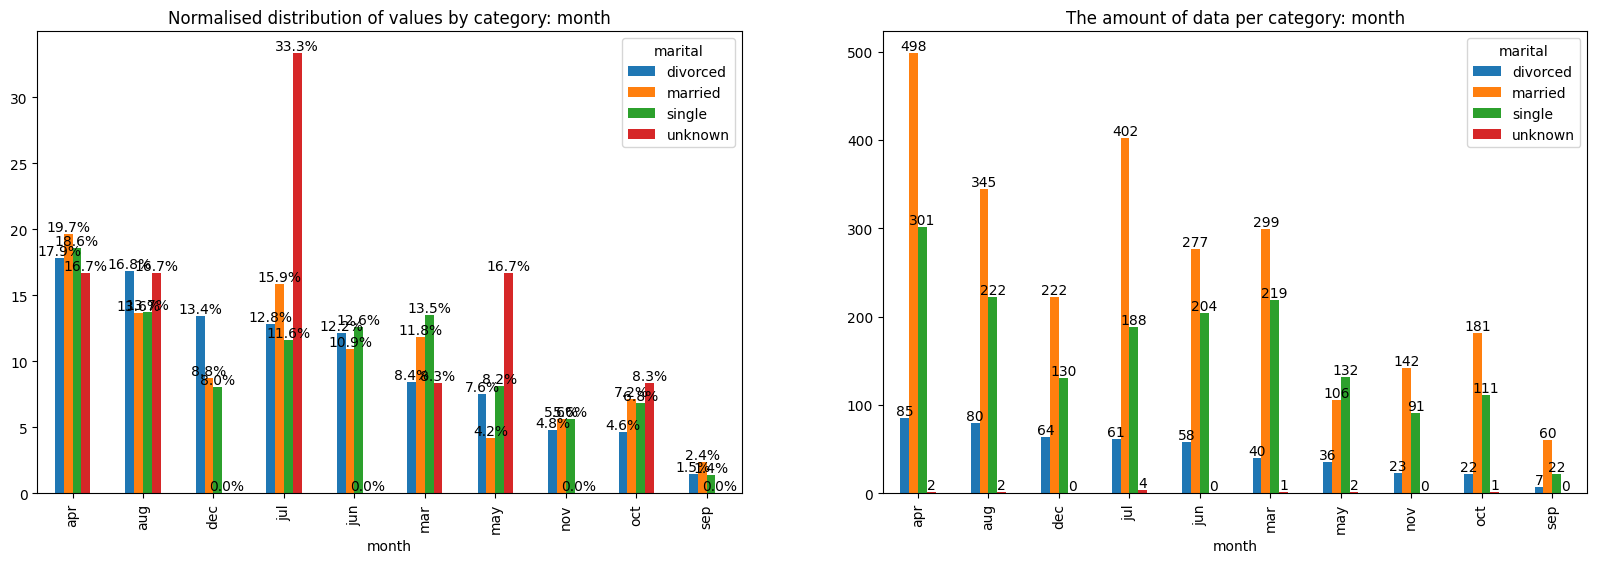

THE CLIENT HAS NOT TAKEN OUT A TERM DEPOSIT


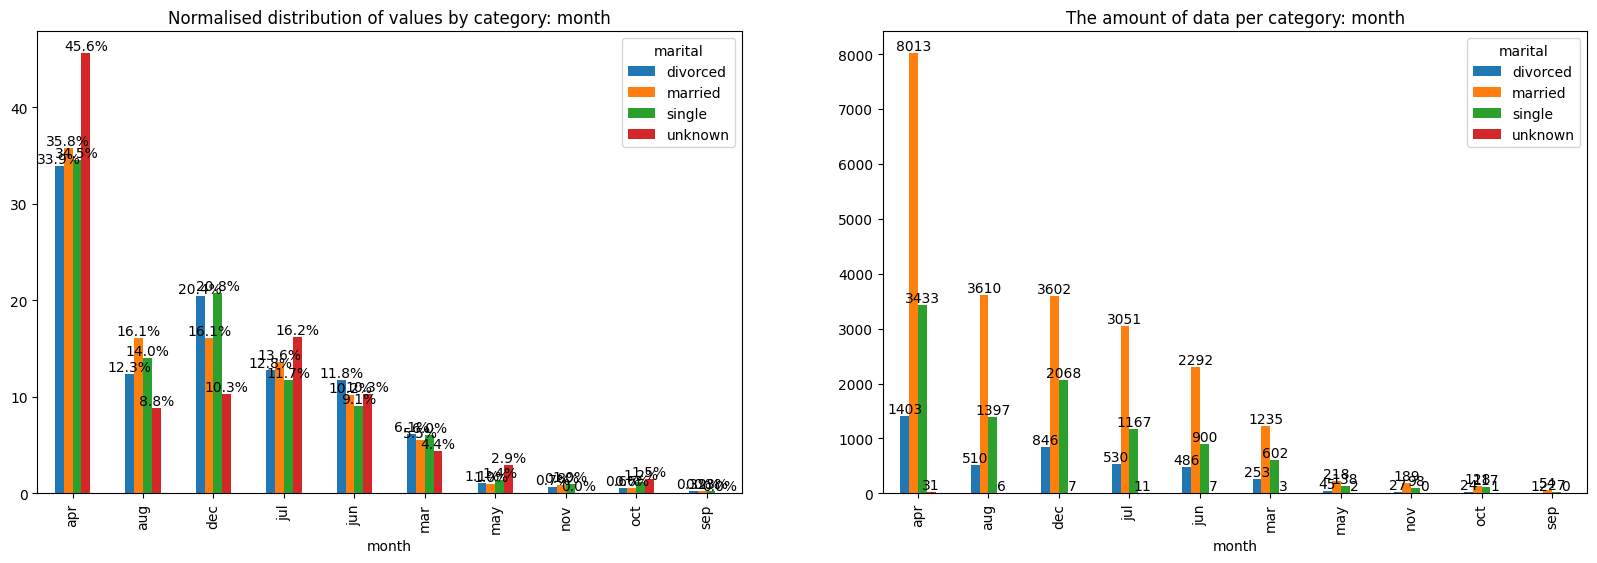

In [40]:
vp.bi_countplot_target(data_clear0, data_clear1, 'month', 'marital')

- For month = July + people to took the deposit, we have weird for unknown marital status 33%, similar situation with May. It's better to double check the reason of such behavior. It looks like as possible errors in the system during data collection.  

In [41]:
data_clear['target'].value_counts(), data_clear['target'].value_counts(normalize=True)

(target
 0    36543
 1     4640
 Name: count, dtype: int64,
 target
 0   0.89
 1   0.11
 Name: proportion, dtype: float64)

Let's convert even categorical data to numerical data and look at the high correlation

In [42]:
dummies_data = pd.get_dummies(data,columns=data.select_dtypes(include='object').columns[:-1],drop_first=True,dtype=int)
dummies_data['y'] = dummies_data['y'].apply(lambda x : 0 if x=='no' else 1)

correlation_with_y = dummies_data.corr()['y'].sort_values()[:-1]
correlation_with_y.loc[abs(correlation_with_y)>0.1]

nr.employed            -0.35
pdays                  -0.32
euribor3m              -0.31
emp.var.rate           -0.30
poutcome_nonexistent   -0.19
contact_telephone      -0.14
cons.price.idx         -0.14
month_may              -0.11
month_sep               0.13
month_oct               0.14
month_mar               0.14
previous                0.23
poutcome_success        0.32
target                  1.00
Name: y, dtype: float64

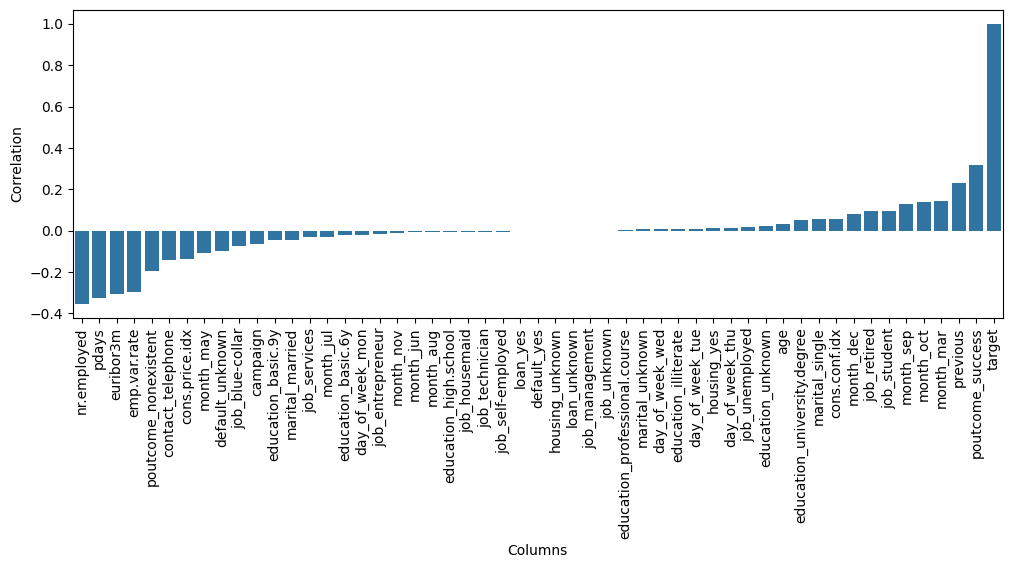

In [43]:
plt.figure(figsize=(12,4),dpi=100)
sns.barplot(x=correlation_with_y.index , y=correlation_with_y)
plt.xticks(rotation=90)
plt.xlabel('Columns')
plt.ylabel('Correlation');

- Features like *poutcome_success* and *previous* have a relatively strong positive influence on the target variable.
- The months of March, September, and October show a positive correlation, suggesting that these months might be more popular for positive outcomes.

## Duplicates 

Finally, we will analyse whether we have any duplicates, make sure that they are duplicates and not similar records, and remove them 

In [44]:
print(f"Duplicate values count: {data_clear.duplicated().sum()}")
data_clear.loc[data_clear.duplicated(keep=False)].head(4)

Duplicate values count: 1784


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,target
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no,0
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no,0
9,25,services,single,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no,0
10,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no,0


In [45]:
df = data_clear.drop_duplicates()

# Feature Engineering

It may help us to cover deeper understanding of the data and discover more complex relationship

Based on the behaviour of categorical data for education, it will be more organisational to divide them into categories that will behave in the same way than by formal division of forms of education.

Thus, we separate the category ‘basic.4y’ to ‘Junior Education’, because these people are more willing to take deposits

In [46]:
# Education
education_mapping = {
    'university.degree': 'University Degree',

    'professional.course': 'Courses',
    'illiterate': 'Courses',
    
    'high.school': 'Secondary Education',
    'basic.9y': 'Basic Education',
    'basic.6y': 'Basic Education',
    
    'basic.4y': 'Junior Education',
    
    'unknown': 'Unknown',
    
}

df['education_grouped'] = df['education'].map(education_mapping)
df.drop('education', axis=1, inplace=True)

In [47]:
# If we have previous contact, we can say that the client is more likely to subscribe
df['pdays_binary'] = np.where(df['pdays'] == 999, 0, 1)

# Job categorization
job_mapping = {
    'admin.': 'White-collar', 'management': 'White-collar', 'entrepreneur': 'White-collar',
    'self-employed': 'White-collar', 'technician': 'White-collar',
    'services': 'Blue-collar', 'blue-collar': 'Blue-collar', 'housemaid': 'Blue-collar',
    'student': 'Other', 'unemployed': 'Other', 'retired': 'Other', 'unknown': 'Other'
}
df['job_category'] = df['job'].map(job_mapping)
df.drop('job', axis=1, inplace=True)

# extra age categories
df['age_group'] = pd.cut(df['age'], bins=[18, 30, 50, np.inf], labels=['Young', 'Middle-aged', 'Senior'])

# any previous money problems
df['financial_risk'] = np.where(
    (df['default'] == 'yes') | ((df['housing'] == 'yes') & (df['loan'] == 'yes')),
    'High Risk', 'Low Risk'
)

# Economic Indicators
df['employment_to_price'] = df['nr.employed'] / df['cons.price.idx']
df['economic_index'] = df['emp.var.rate'] + df['cons.conf.idx'] + df['euribor3m']

Lets apply Cyclical Encoding of time variables like month and day, by extracting sin and cos functions.

In [48]:


# Create cyclical features for mont of the week
month_map = {'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6,
             'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12}
df['month_num'] = df['month'].map(month_map)
df['month_sin'] = np.sin(2 * np.pi * df['month_num'] / 12)
df['month_cos'] = np.cos(2 * np.pi * df['month_num'] / 12)

# Create cyclical features for day of the week
day_map = {'mon': 1, 'tue': 2, 'wed': 3, 'thu': 4, 'fri': 5}
df['day_num'] = df['day_of_week'].map(day_map)
df['day_sin'] = np.sin(2 * np.pi * df['day_num'] / 5) 
df['day_cos'] = np.cos(2 * np.pi * df['day_num'] / 5)

In [49]:
# Assign seasons based on month
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Autumn'

df['season'] = df['month_num'].apply(get_season)

# Add official holidays in Portugal
portuguese_bank_holidays = {
    1: ["New Year's Day"], 
    4: ["Good Friday"], 
    5: ["Labour Day"], 
    6: ["Portugal Day", "Corpus Christi"], 
    8: ["Assumption Day"], 
    10: ["Republic Day"], 
    11: ["All Saints' Day"], 
    12: ["Immaculate Conception", "Christmas Day"]
}

df['has_holiday'] = df['month_num'].apply(lambda x: 1 if x in portuguese_bank_holidays else 0)

#  whether a month has a possitive correlation with the target variable
correlated_positive_month = {
    3: ["March"], 
    5: ["May"], 
    9: ["September"], 
    10: ["Oct"], 
    11: ["Nov"]
}

df['month_positive'] = df['month_num'].apply(lambda x: 1 if x in correlated_positive_month else 0)


df.drop(columns=['month', 'day_of_week', 'month_num', 'day_num'], inplace=True)

In [287]:
df.head()

,age,marital,default,housing,loan,contact,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,target,education_grouped,pdays_binary,job_category,age_group,financial_risk,employment_to_price,economic_index,month_sin,month_cos,day_sin,day_cos,season,has_holiday,month_positive
0,56,married,no,no,no,telephone,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no,0,Junior Education,0,Blue-collar,Senior,Low Risk,55.23,-30.44,0.50,-0.87,0.95,0.31,Spring,1,1
1,57,married,unknown,no,no,telephone,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no,0,Secondary Education,0,Blue-collar,Senior,Low Risk,55.23,-30.44,0.50,-0.87,0.95,0.31,Spring,1,1
2,37,married,no,yes,no,telephone,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no,0,Secondary Education,0,Blue-collar,Middle-aged,Low Risk,55.23,-30.44,0.50,-0.87,0.95,0.31,Spring,1,1
3,40,married,no,no,no,telephone,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no,0,Basic Education,0,White-collar,Middle-aged,Low Risk,55.23,-30.44,0.50,-0.87,0.95,0.31,Spring,1,1
4,56,married,no,no,yes,telephone,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no,0,Secondary Education,0,Blue-collar,Senior,Low Risk,55.23,-30.44,0.50,-0.87,0.95,0.31,Spring,1,1


- We added economic indicators (based on prior knowledge from the internet)
- Combined different types of work into categories
- We chose cyclic encoding for days and months, and used sine and cosine functions to describe their behaviour
- We also created separate columns which indicate months with Portuguese holidays and seasons
- Separately identified months in which people were more interested in deposits based on EDA

In [289]:
df.drop(columns=['y'], inplace=True)

C:\Users\Olha Shaposhnyk\AppData\Local\Temp\ipykernel_36224\2235115430.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['y'], inplace=True)


In [290]:
df.to_csv('../data/bank-additional-full-clean.csv', index=False)

# Conclusion

Our hypothesis is that  economics rates such as *nr.employed*, *euribor3m* can strongly influence deposit approvals. 
Also, the month of contact plays a significant role.
And Finally the presence of previous contact with the person *pdays* should be important for decision making

Because we have a very unbalanced class (90/10), accuracy is not a good metric to use. Lets select another: 

- F1 score: The harmonic mean of accuracy and recall. It balances the two metrics and is particularly useful when both false positives and false negatives are important.
- Average Precision: summarizes a precision-recall (PR) curve into a single value, representing the average of all precisions. It's better to use PRAUC because I think detecting the positive class is more important for this task (ROCAUC suggests the equal importance of both classes)
- Precision: Measures the performance of positive predictions to minimize false positives.
- Recall : Measures how well the model captures actual positives to minimize false negatives.



Given the objective of predicting that a customer will sign up for a time deposit, and considering that marketing strategies aim to maximize customer acquisition while maintaining resource efficiency, we will focus on the **F1 Score** as a *primary metric*.
If the F1 values are the same for the two models, then we will use the **Average Precision** as a *secondary metric*, which also works well for unbalanced classification
